## Linear Regression Exercise

Exercise: Predict the pay of an employee based on their years of experience and designation.

Designation Levels in the organization	
1	Executive
2	Manager
3	Senior manager
4	Director


In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns


In [5]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("EmployeesData.csv")

In [6]:
# Check top few records to get a feel of the data structure
df.head(50)

,Years of experience,Designation,Pay
0,3,1,389766
1,3,1,461384
2,3,1,350832
3,1,1,354735
4,3,1,382593
5,3,1,464375
6,3,1,324080
7,2,1,375247
8,2,1,427186
9,4,2,667277


In [9]:
#Lets analysze the distribution of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Years of experience,28.0,4.142857,1.799471,1.0,3.00,3.5,5.0,8.0
Designation,28.0,2.071429,0.978607,1.0,1.00,2.0,3.0,4.0
Pay,28.0,632966.392857,282289.059415,324080.0,420904.25,565050.0,710928.0,1320958.0


In [38]:
#understanding the datatypes
df.dtypes

Years of experience    int64
Designation            int64
Pay                    int64
dtype: object

In [39]:
#checking for any null values
df[df.isnull().any(axis=1)]

,Years of experience,Designation,Pay


In [40]:
#No null values in this case but if you find null values you can either drop the values or try replacing nan with median
#df = df.apply(lambda x: x.fillna(x.median()),axis=0)

In [41]:
# Getting The five-number summary
df.describe()

,Years of experience,Designation,Pay
count,28.000000,28.000000,2.800000e+01
mean,4.142857,2.071429,6.329664e+05
std,1.799471,0.978607,2.822891e+05
min,1.000000,1.000000,3.240800e+05
25%,3.000000,1.000000,4.209042e+05
50%,3.500000,2.000000,5.650500e+05
75%,5.000000,3.000000,7.109280e+05
max,8.000000,4.000000,1.320958e+06


In [42]:
#Median salary for each designation
df.groupby('Designation')['Pay'].median()

Designation
1     382593
2     573860
3     836907
4    1317731
Name: Pay, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021747B3FDA0>,
      dtype=object)

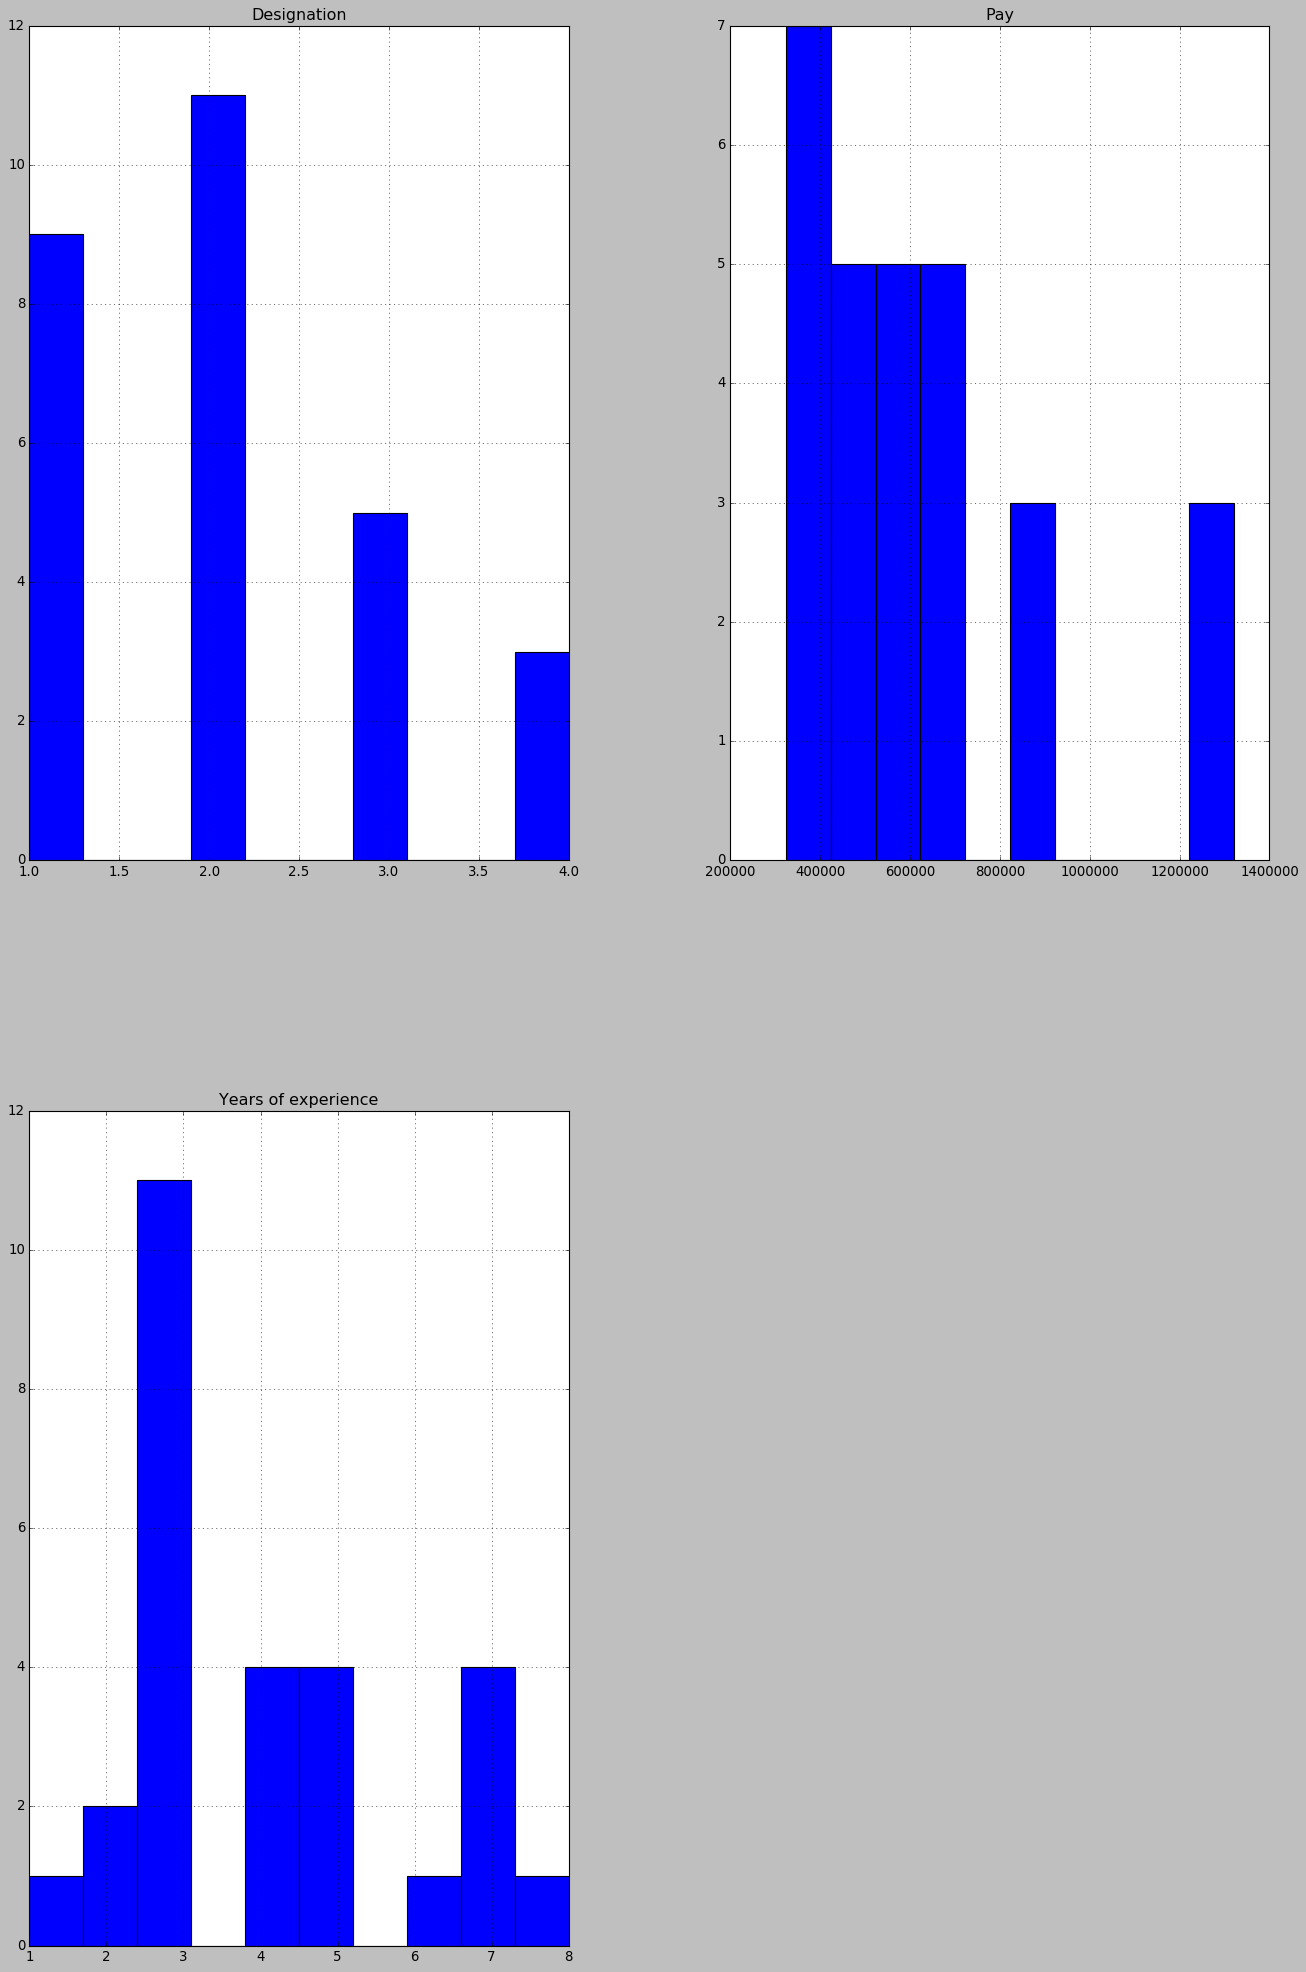

In [43]:
#viewing the data in histograms
df.hist(figsize = (20,30))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


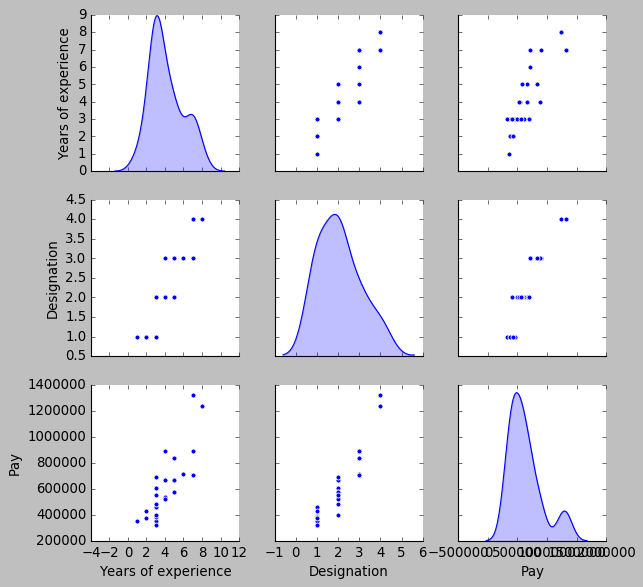

In [44]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
sns.pairplot(df, diag_kind='kde')   # to plot density curve instead of histogram

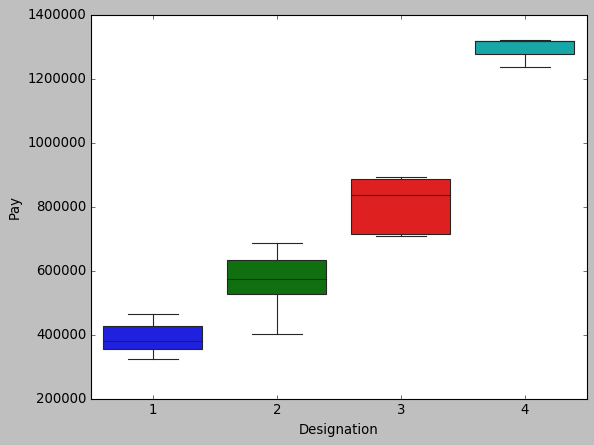

In [45]:
fig = sns.boxplot(x='Designation', y="Pay", data=df)

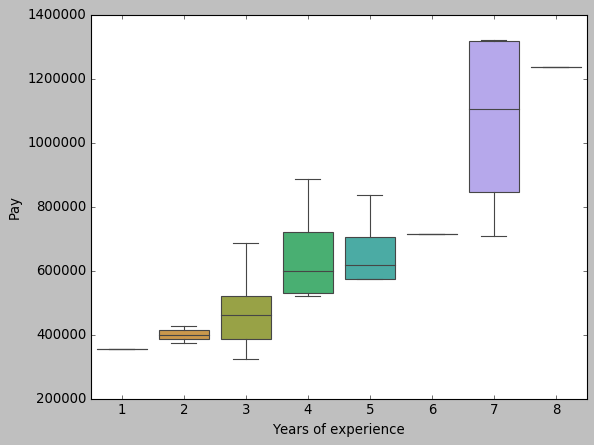

In [46]:
fig = sns.boxplot(x='Years of experience', y="Pay", data=df)

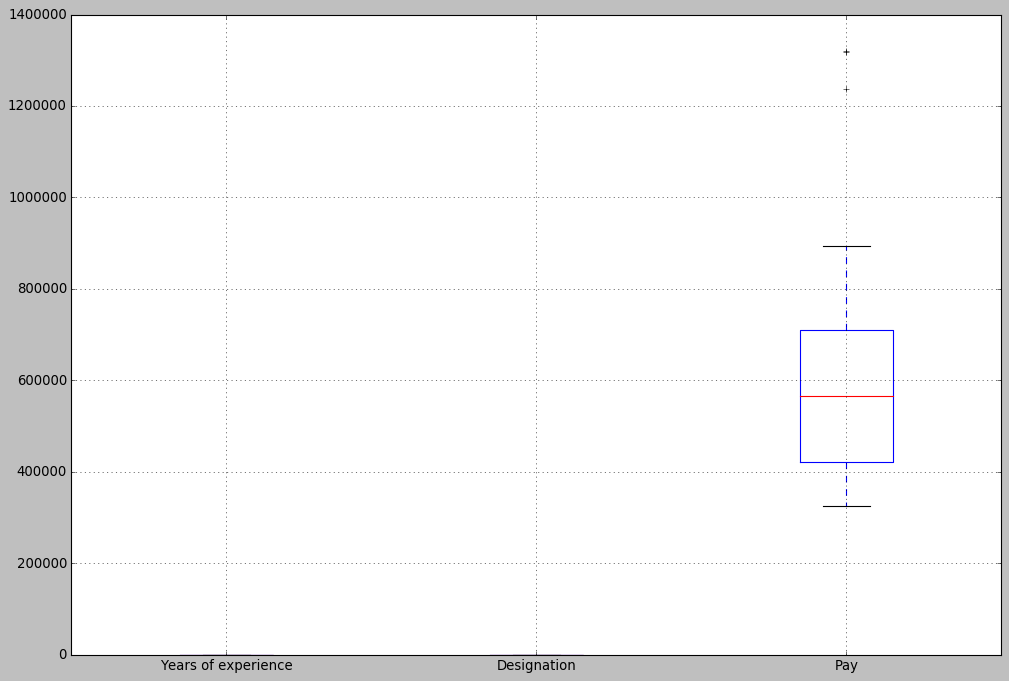

In [47]:
df.boxplot(figsize=(15, 10))

### Correlations

In statistics, Spearman's rank correlation coefficient or Spearman's rho, named after Charles Spearman and often denoted by the Greek letter $\rho$ (rho) or as $r_{s}$, is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.

The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.

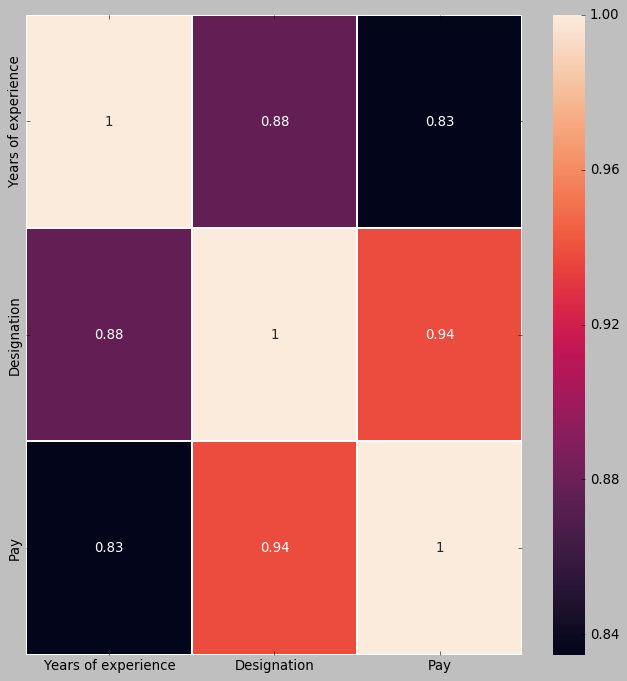

In [48]:
import matplotlib.pylab as plt
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=1)

In order to run our models on the data, I had to transform many of the variables. The following pre-processing steps can be taken:

- Removing outliers: In case the classic Tukey method of taking 1.5 * IQR to remove outliers removes too much data then remove values that are outside of 3 * IQR instead.

- Filling NaN values: As there are no null values found in our dataset, so need to handle it.

- Create dummy variables for the categorical variables (not needed)

- Split the data into a training set and a test set

- Scaled the data (in case of non linear relashionship)

In [49]:
# Copy all the predictor variables into X dataframe
X = df.drop('Pay', axis=1)

# Copy the 'Pay' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['Pay']]

In [50]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [51]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [52]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Years of experience is 34592.12769650382
The coefficient for Designation is 241702.78477560135


In [54]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 27579.230845524464


In [55]:
regression_model.score(X_train, y_train)

0.9355819227610723

In [56]:
# So the model explains 93.5% of the variability in Y using X